In [9]:
import pandas as pd
import os

import numpy as np

import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [11]:
from nexa_py_sentimotion_mapper.sentimotion_mapper import Mapper


In [3]:
from constants import ROOT_DIR

In [4]:
from typing import List

def slice_by(df: pd.DataFrame, column_name_to_slice_by: str) -> List[pd.DataFrame]:
    """
    :param df: dataframe with multiple time series
    :param column_name_to_slice_by: str, column name to identify unique time series
    :return: list of dataframes.
    """
    ret = []
    for _, group in df.groupby(column_name_to_slice_by, sort=False):
        ret.append(group)
    return ret

In [5]:
path = os.path.join(ROOT_DIR, "data/export/merged_surveys.csv")

df = pd.read_csv(path)
print(df.shape)
df.head()

(33600, 18)


,user_id,survey_id,survey_item_index,filename,has_reply,time_spent_on_item,video_duration,last_modified,emotion_1,video_id,mix,emotion_1_id,emotion_2_id,intensity_level,reply,generic_id,condition,accurate
0,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,0,A221_gra_v_2.mp4,1,6882,4660,2024-12-16T16:54:43.230284+01:00,gratitude,A221,0,7,100,2,37,12,furhat_audio_video_,False
1,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,1,A426_conc_p_2.mp4,1,7659,2820,2024-12-16T16:54:51.200502+01:00,concentration,A426,0,27,100,2,26,12,furhat_audio_video_,False
2,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,2,A67_conc_p_2.mp4,1,9514,7840,2024-12-16T16:55:01.101944+01:00,concentration,A67,0,27,100,2,26,12,furhat_audio_video_,False
3,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,3,A407_bor_p_2.mp4,1,5985,2760,2024-12-16T16:55:07.403552+01:00,boredom,A407,0,26,100,2,26,12,furhat_audio_video_,True
4,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,4,A417_det_p_3.mp4,1,4948,2180,2024-12-16T16:55:12.743556+01:00,determination,A417,0,2,100,3,2,12,furhat_audio_video_,True


In [13]:
df["condition"].unique()

array(['furhat_audio_video_', 'original_video_', 'original_audio_',
       'metahuman_video_', 'furhat_video_', 'original_audio_video_',
       'metahuman_audio_video_'], dtype=object)


Condition: furhat_audio_video_


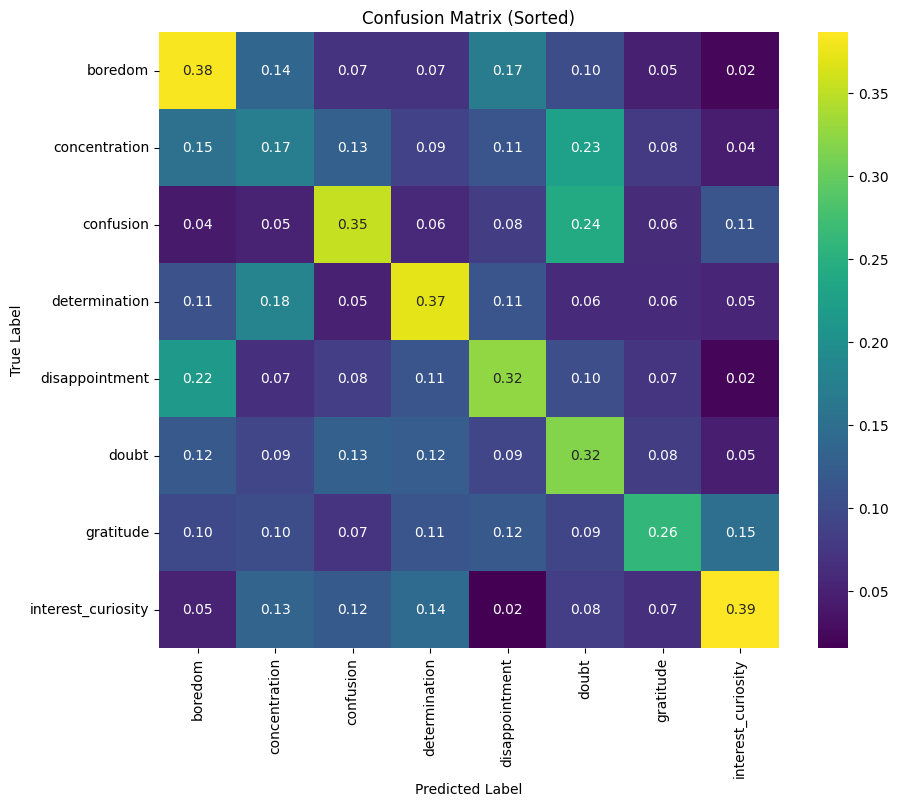


Condition: original_video_


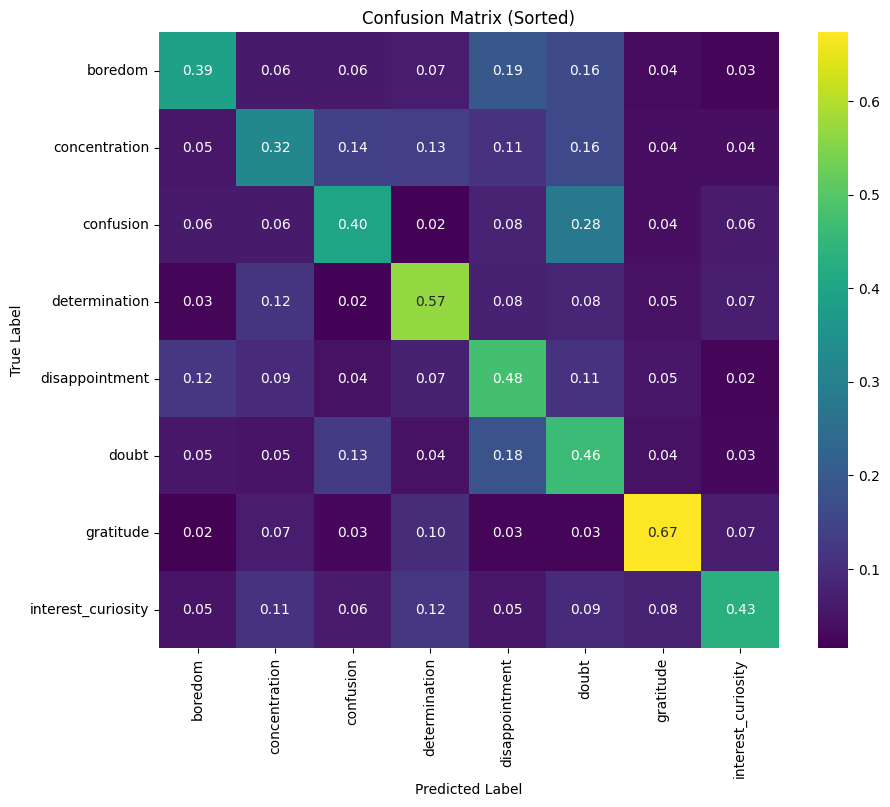


Condition: original_audio_


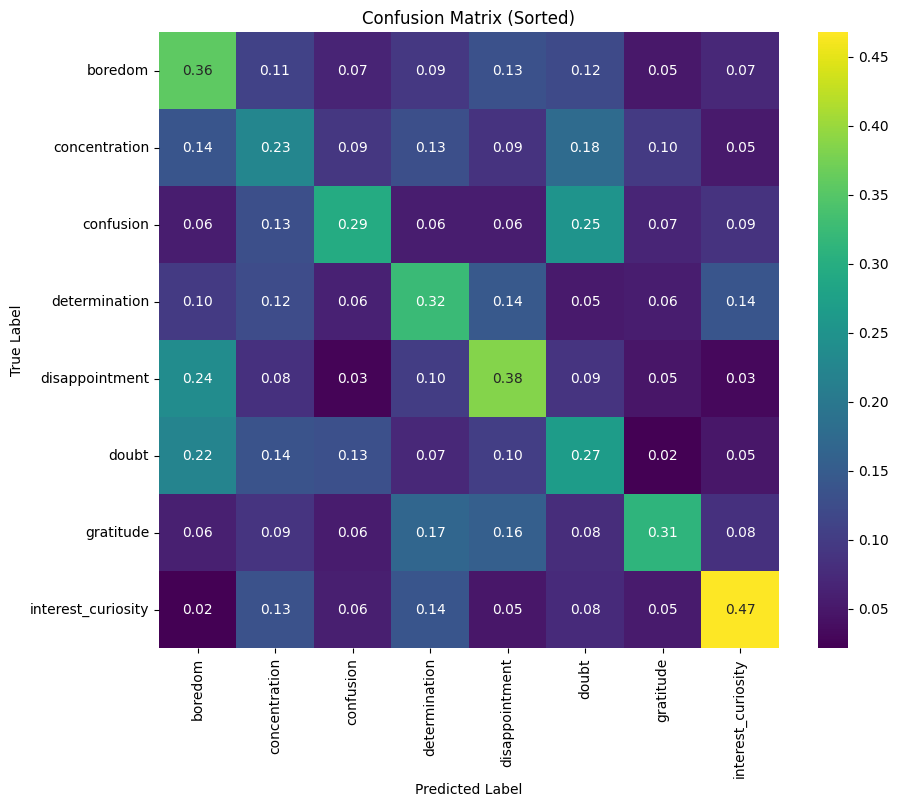


Condition: metahuman_video_


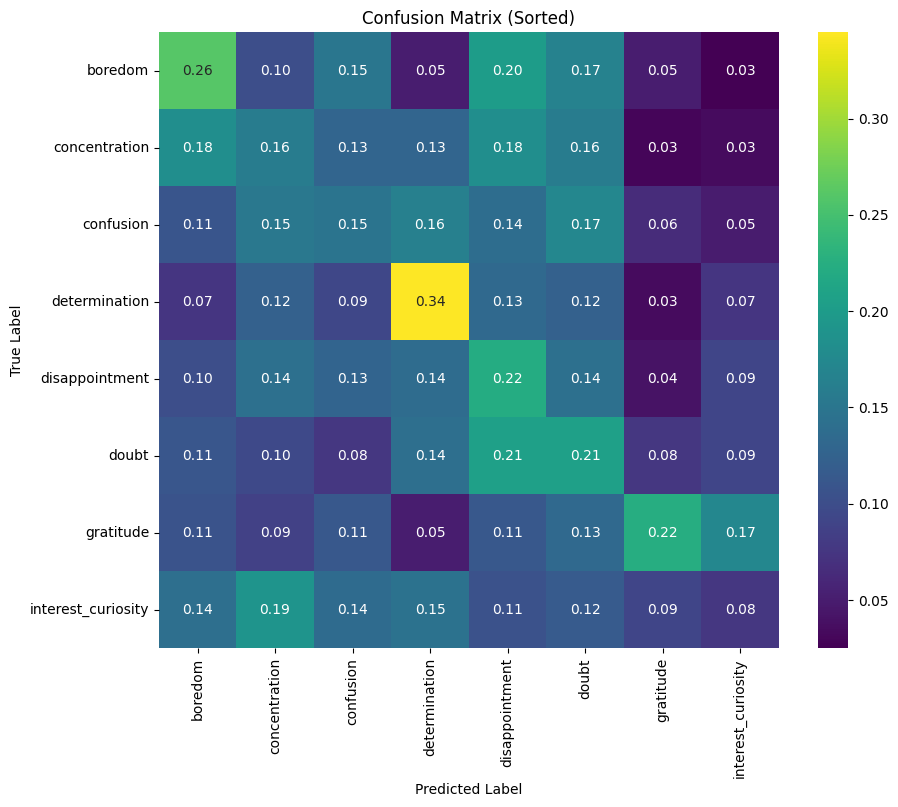


Condition: furhat_video_


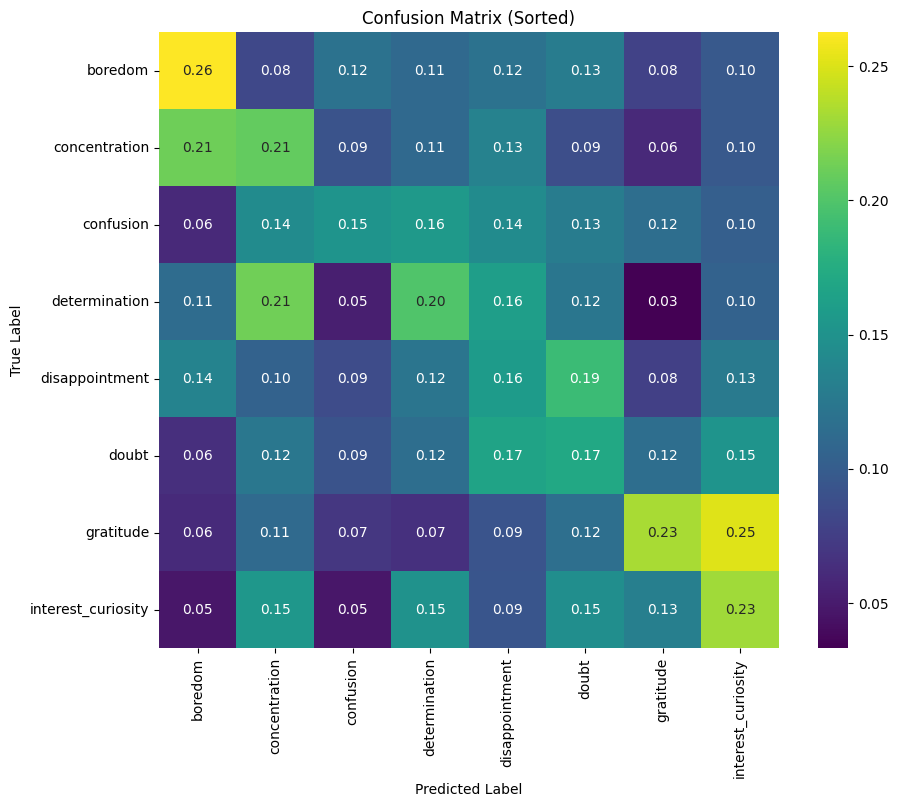


Condition: original_audio_video_


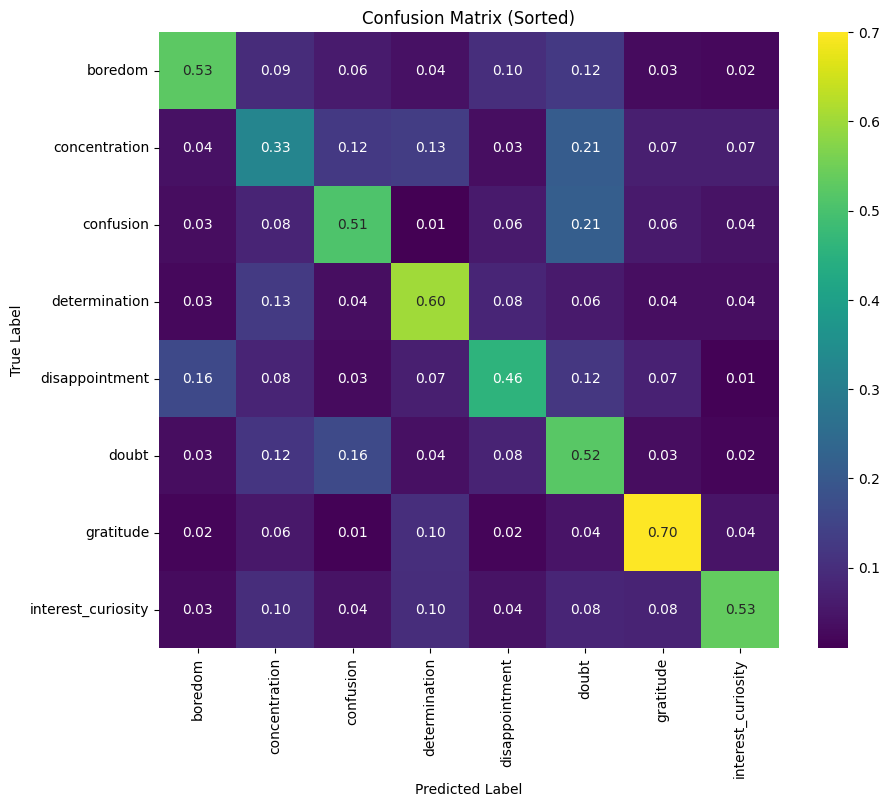


Condition: metahuman_audio_video_


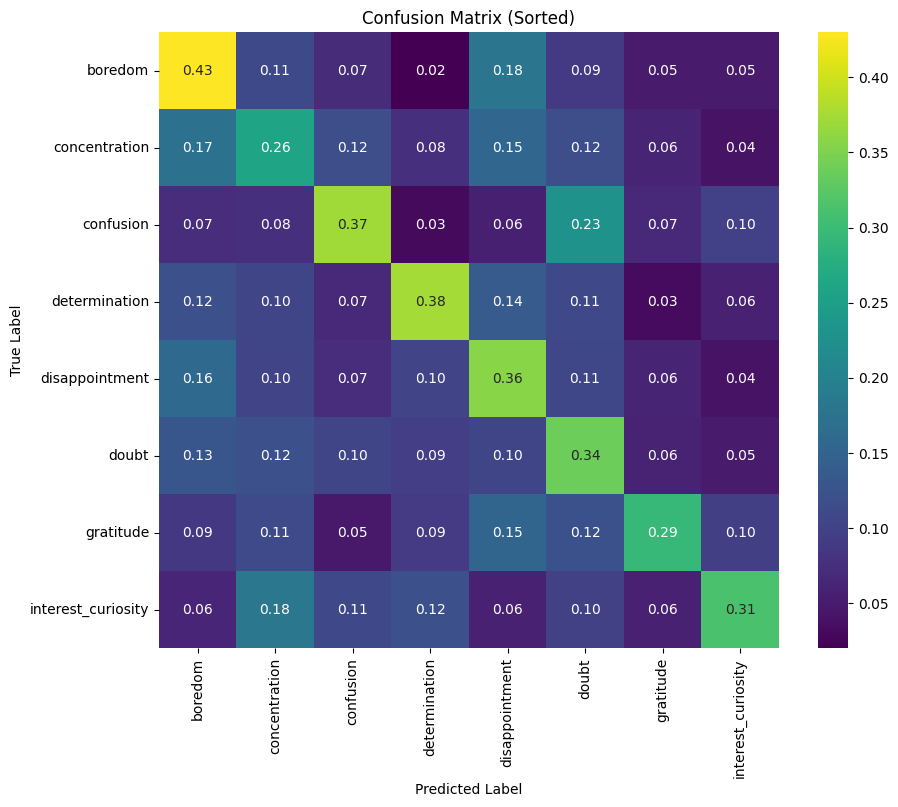

In [22]:
conditions = ['original_video_', 'metahuman_video_', 'furhat_video_']

for c in df["condition"].unique():
    print("\nCondition:", c)
    df_c = df[df["condition"] == c]

    y_true = df_c[["emotion_1_id"]]
    y_pred = df_c[["reply"]]

    emotion_ids = np.unique(y_true)
    emotions = Mapper.get_emotion_from_id(emotion_ids)

    sorted_indices = np.argsort(emotions)  # Get sorting indices
    sorted_emotions = np.array(emotions)[sorted_indices]  # Sort labels

    # Reorder y_true and y_pred based on the sorted order
    sorted_conf_matrix = confusion_matrix(y_true, y_pred, labels=emotion_ids[sorted_indices], normalize='true')

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(sorted_conf_matrix, annot=True, fmt='.2f', cmap='viridis',
                xticklabels=sorted_emotions, yticklabels=sorted_emotions)
    plt.title('Confusion Matrix (Sorted)')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

## Accuracy by emotion

In [23]:
df['emotion'] = df['emotion_1_id'].map(Mapper.get_emotion_from_id)
df.head()

,user_id,survey_id,survey_item_index,filename,has_reply,time_spent_on_item,video_duration,last_modified,emotion_1,video_id,mix,emotion_1_id,emotion_2_id,intensity_level,reply,generic_id,condition,accurate,emotion
0,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,0,A221_gra_v_2.mp4,1,6882,4660,2024-12-16T16:54:43.230284+01:00,gratitude,A221,0,7,100,2,37,12,furhat_audio_video_,False,gratitude
1,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,1,A426_conc_p_2.mp4,1,7659,2820,2024-12-16T16:54:51.200502+01:00,concentration,A426,0,27,100,2,26,12,furhat_audio_video_,False,concentration
2,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,2,A67_conc_p_2.mp4,1,9514,7840,2024-12-16T16:55:01.101944+01:00,concentration,A67,0,27,100,2,26,12,furhat_audio_video_,False,concentration
3,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,3,A407_bor_p_2.mp4,1,5985,2760,2024-12-16T16:55:07.403552+01:00,boredom,A407,0,26,100,2,26,12,furhat_audio_video_,True,boredom
4,furhat_audio_video_0012,00e3e851d15293e8eb60335e42354a59794eec7a47ba0a...,4,A417_det_p_3.mp4,1,4948,2180,2024-12-16T16:55:12.743556+01:00,determination,A417,0,2,100,3,2,12,furhat_audio_video_,True,determination


In [26]:
conditions = ['original_video_', 'metahuman_video_', 'furhat_video_']

for c in conditions:
    print("\nCondition:", c)
    df_c = df[df["condition"] == c]

    # Group the DataFrame by 'emotion_id' and calculate the accuracy for each ID
    accuracy_by_emotion = df_c.groupby('emotion')['accurate'].mean().reset_index()

    # Rename the columns for clarity
    accuracy_by_emotion.columns = ['emotion', 'accuracy']

    # Print or plot the accuracy results
    print(accuracy_by_emotion.sort_values(by='accuracy', ascending=False))






Condition: original_video_
              emotion  accuracy
6           gratitude  0.673469
3       determination  0.567839
4      disappointment  0.477612
5               doubt  0.462687
7  interest_curiosity  0.433498
2           confusion  0.399015
0             boredom  0.392857
1       concentration  0.323383

Condition: metahuman_video_
              emotion  accuracy
3       determination  0.344828
0             boredom  0.260000
6           gratitude  0.224490
4      disappointment  0.222222
5               doubt  0.206030
1       concentration  0.157635
2           confusion  0.148515
7  interest_curiosity  0.075377

Condition: furhat_video_
              emotion  accuracy
0             boredom  0.262673
6           gratitude  0.232558
7  interest_curiosity  0.230047
1       concentration  0.207373
3       determination  0.199052
5               doubt  0.170507
4      disappointment  0.158371
2           confusion  0.152074


In [27]:
conditions = ['original_video_', 'metahuman_video_', 'furhat_video_']
accuracy_results = {}

# Compute accuracy for each condition
for c in conditions:
    df_c = df[df["condition"] == c]
    accuracy_by_emotion = df_c.groupby('emotion')['accurate'].mean()
    accuracy_results[c] = accuracy_by_emotion  # Store results in dictionary

# Convert to DataFrame for easy comparison
accuracy_df = pd.DataFrame(accuracy_results)

# Calculate performance drop relative to 'original_video_' (assumed baseline)
baseline = accuracy_df['original_video_']
performance_drop = accuracy_df.sub(baseline, axis=0)  # Subtract baseline from all conditions

performance_drop

,original_video_,metahuman_video_,furhat_video_
emotion,,,
boredom,0.0,-0.132857,-0.130184
concentration,0.0,-0.165748,-0.116010
confusion,0.0,-0.250500,-0.246941
determination,0.0,-0.223012,-0.368787
disappointment,0.0,-0.255390,-0.319241
doubt,0.0,-0.256656,-0.292180
gratitude,0.0,-0.448980,-0.440911
interest_curiosity,0.0,-0.358121,-0.203451


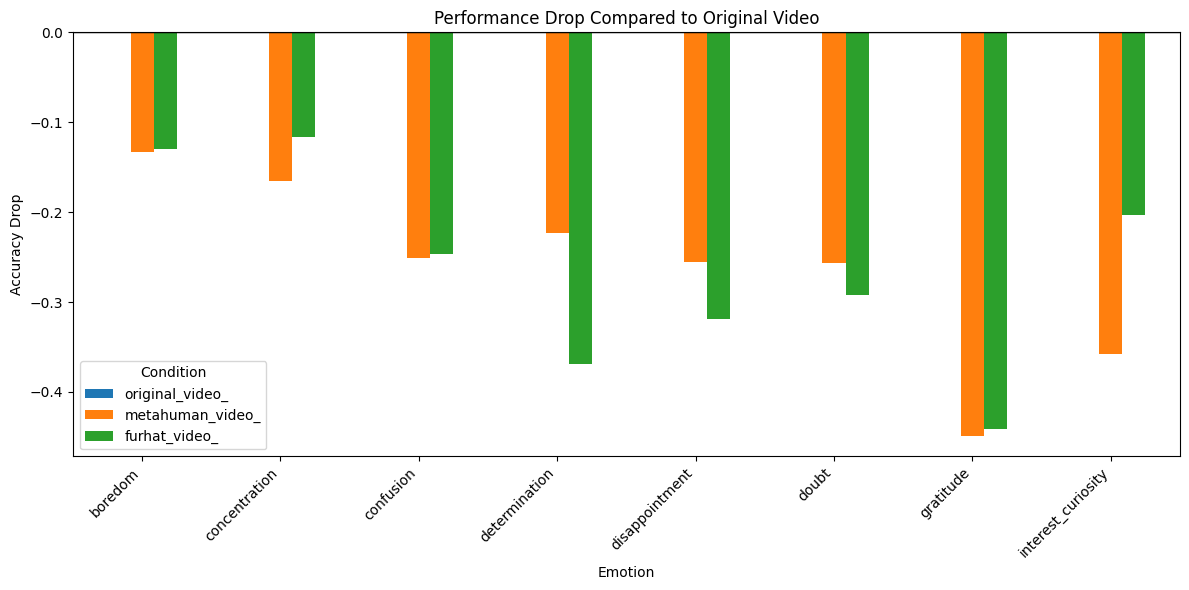

In [28]:
# Plot performance drop as a bar chart
performance_drop.plot(kind='bar', figsize=(12, 6))

# Formatting
plt.axhline(0, color='black', linewidth=1)  # Add a horizontal line at 0 for reference
plt.xticks(rotation=45, ha='right')
plt.title("Performance Drop Compared to Original Video")
plt.ylabel("Accuracy Drop")
plt.xlabel("Emotion")
plt.legend(title="Condition", loc="best")
plt.tight_layout()

# Show plot
plt.show()


Condition: furhat_audio_video_
(4704, 18)
0.3201530612244898

Condition: original_video_
(4800, 18)
0.465625

Condition: original_audio_
(4512, 18)
0.32845744680851063

Condition: metahuman_video_
(4800, 18)
0.205

Condition: furhat_video_
(5184, 18)
0.2013888888888889

Condition: original_audio_video_
(4896, 18)
0.5208333333333334

Condition: metahuman_audio_video_
(4704, 18)
0.3424744897959184
                condition  accuracy
0     furhat_audio_video_  0.320153
1         original_video_  0.465625
2         original_audio_  0.328457
3        metahuman_video_  0.205000
4           furhat_video_  0.201389
5   original_audio_video_  0.520833
6  metahuman_audio_video_  0.342474


<Axes: xlabel='condition'>

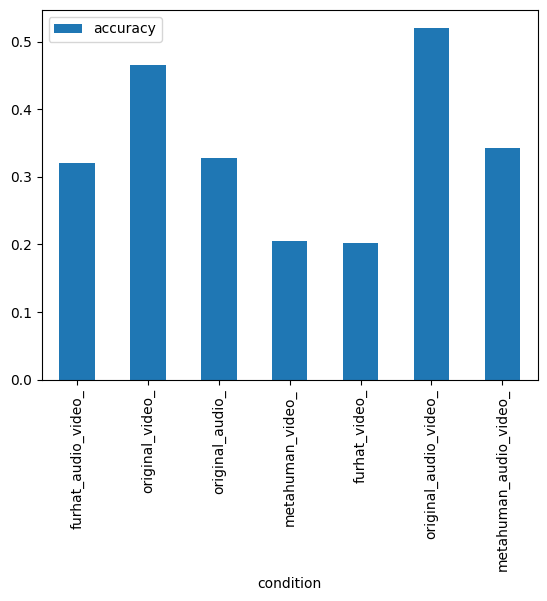

In [6]:
conditions = df["condition"].unique()

accuracies = []

for c in conditions:
    print("\nCondition:", c)

    df_c = df[df["condition"] == c]

    print(df_c.shape)
    print(df_c["accurate"].mean())


    accuracies.append({"condition":
                        c, "accuracy":
                        df_c["accurate"].mean()})


df_accuracies = pd.DataFrame(accuracies)
print(df_accuracies)
df_accuracies.plot(x="condition", y="accuracy", kind="bar")

In [7]:
conditions = df["condition"].unique()
ids = df["generic_id"].unique()

accuracies = []

for c in conditions:
    print("\nCondition:", c)
    df_c = df[df["condition"] == c]

    for i in ids:
        df_i = df_c[df_c["generic_id"] == i]
        accuracies.append({"condition": c, "generic_id": i, "accuracy": df_i["accurate"].mean()})


df_accuracies = pd.DataFrame(accuracies)
df_accuracies


Condition: furhat_audio_video_

Condition: original_video_

Condition: original_audio_

Condition: metahuman_video_

Condition: furhat_video_

Condition: original_audio_video_

Condition: metahuman_audio_video_


,condition,generic_id,accuracy
0,furhat_audio_video_,12,0.40625
1,furhat_audio_video_,26,0.28125
2,furhat_audio_video_,8,0.25000
3,furhat_audio_video_,7,0.37500
4,furhat_audio_video_,66,0.06250
...,...,...,...
373,metahuman_audio_video_,20,0.21875
374,metahuman_audio_video_,34,NaN
375,metahuman_audio_video_,1,NaN
376,metahuman_audio_video_,59,NaN
